In [4]:
import json
import sys

import numpy as np
import pandas as pd
import missingno
from toolz.curried import *
from matplotlib import pyplot as plt

sys.path.append('..')
import import_ipynb
from cleaning.data_cleaning import load_ranking_df, load_athlete_df, load_event_df

print('done')

done


In [2]:
athletes = load_athlete_df()
rankings = load_ranking_df()
merged = rankings.merge(athletes, on=['ID', 'First Name', 'Last Name'])
merged['age'] = merged['Year'] - merged['birth_year']

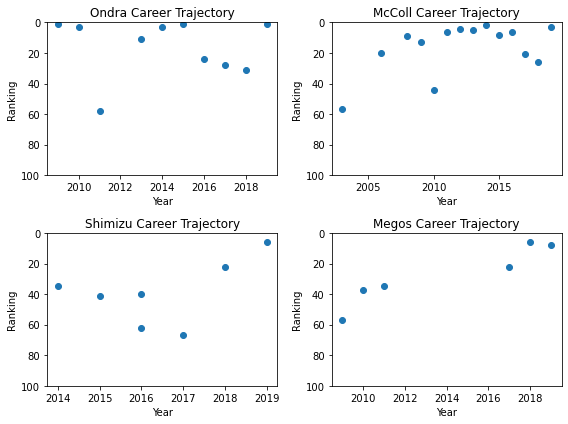

In [34]:
# small_merged = merged[0:100]
# print(small_merged.columns)
# small_merged.plot(kind='scatter', x='Year', y='Rank', ylim=(108, 0))
rankings[rankings['Year'] == 2019].loc[rankings['Event']=='lead']
top_10_IDs = rankings['Last Name'][:10].to_numpy()
lead = merged.loc[merged['Event']=='lead']
top_10 = lead[lead['Last Name'].isin(top_10_IDs)]

count = 1
for i, ID in enumerate(top_10_IDs[:10]):
    if i in [0, 2, 5, 7]:
        plt.subplot(2, 2, count)
        single_athlete = lead.loc[lead['Last Name'] == ID]
        plt.scatter(single_athlete['Year'], single_athlete['Rank'])
        plt.title("{} Career Trajectory".format(ID))
        plt.ylabel('Ranking')
        plt.ylim(100, 0)
        plt.xlabel('Year')
        count += 1
plt.rcParams['figure.figsize'] = 8, 6
plt.tight_layout()
plt.savefig('Several trajectories.png')
plt.show()

In [65]:
lead = merged.loc[merged['Event']=='lead']